<a href="https://colab.research.google.com/github/nilishalu/ML_SGP/blob/main/Week3_ML_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 ) To get hands on experience and understanding of K-Means algorithm, Perform
Clustering to the following dataset:

Dataset: Simple_Dataset

Dataset has coordinates of 20 points (x,y)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

df=pd.DataFrame({'x':[60,7,3,38,13,30,39,33,51,77,79,31,34,48,4,55,20,45,14,24],
                 'y':[30,40,52,18,38,37,62,68,72,59,17,41,29,4,57,61,12,56,63,79]
                 })

kmeans=KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.predict(df)
centroids =kmeans.cluster_centers_

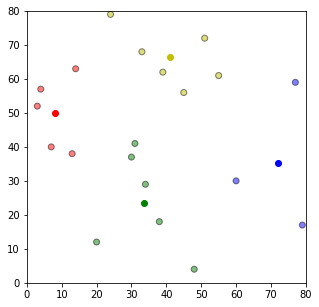

In [ ]:
fig = plt.figure(figsize=(5,5))
colmap={1:'r',2:'b',3:'g',4:'y'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter( df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')

for i,centroid in enumerate(centroids):
   plt.scatter(*centroid, color=colmap[i+1])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()  

Q2 ) Perform K-Means Clustering for the following dataset, also known as Customer
segmentation problems, (Take Number of clusters = 5)

Dataset: Dataset.csv

Dataset has 5 columns:

Customer_ID : Unique ID assigned to the customer

Gender : Gender of the customer

Age: Age of the customer

Annual Income:A nnual Income of the customer

Spending Score (1-100): Score assigned by the mall based on customer behavior and
spending nature

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df2.drop(["CustomerID"],axis=1,inplace=True) # Dropping Customer ID column which is not relevant for clustering
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df2.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.predict(df2.iloc[:,1:])
centroids =kmeans.cluster_centers_

Code for the clustering plot


TypeError: ignored

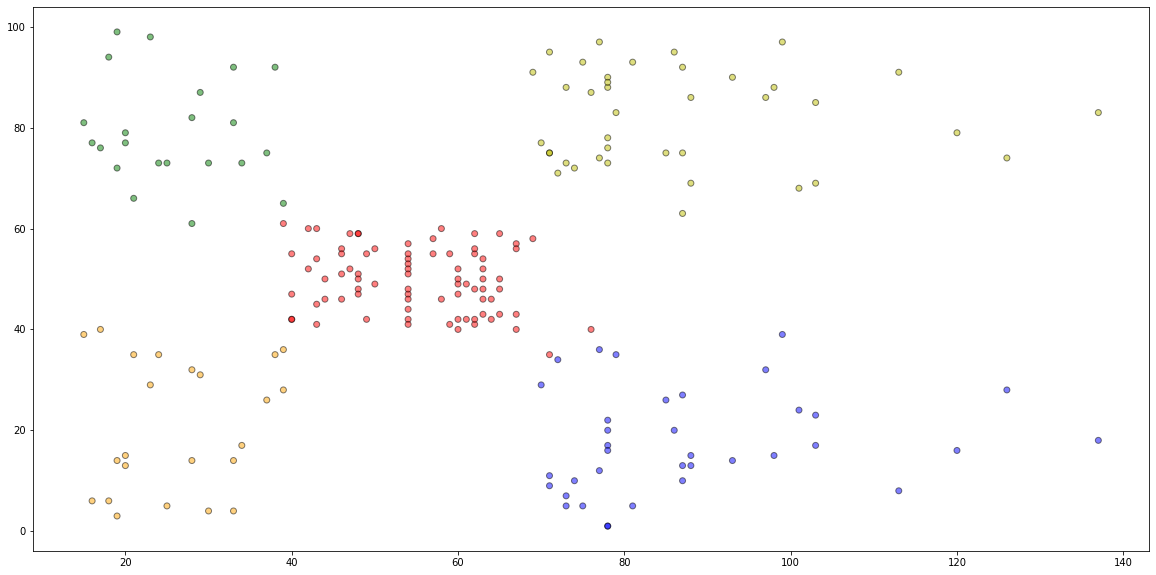

In [ ]:
fig = plt.figure(figsize=(20,10))
colmap={1:'r',2:'b',3:'g',4:'y',5:'orange'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter( df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c=colors1, alpha=0.5, edgecolor='k')

for i,centroid in enumerate(centroids):
   plt.scatter(*centroid, c=colmap[i+1])

plt.xlim(0,140)
plt.ylim(0,100)
plt.show()  


 Code for the visualization in 3D plot

In [ ]:
df2['label'] = kmeans.predict(df2.iloc[:,1:])

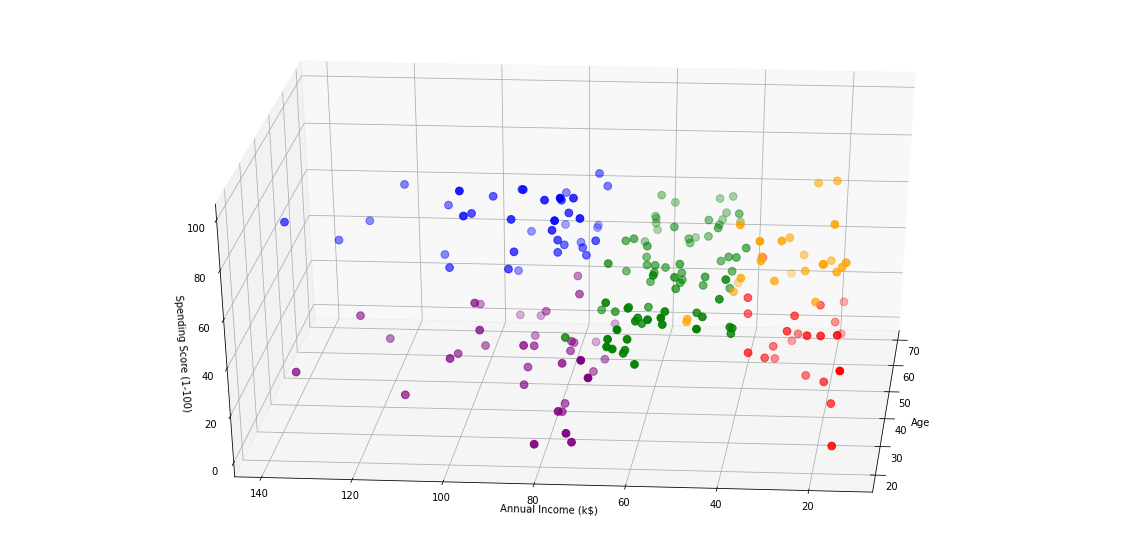

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2["Age"][df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='red', s=60)
ax.scatter(df2["Age"][df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='blue', s=60)
ax.scatter(df2["Age"][df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='green', s=60)
ax.scatter(df2["Age"][df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='purple', s=60)
ax.scatter(df2["Age"][df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()